<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB
            price        area    bedrooms   bathrooms     stories    mainroad  \
count  545.000000  545.000000  545.000000  545.000000  545.000000  545.000000   
mean     0.261189 

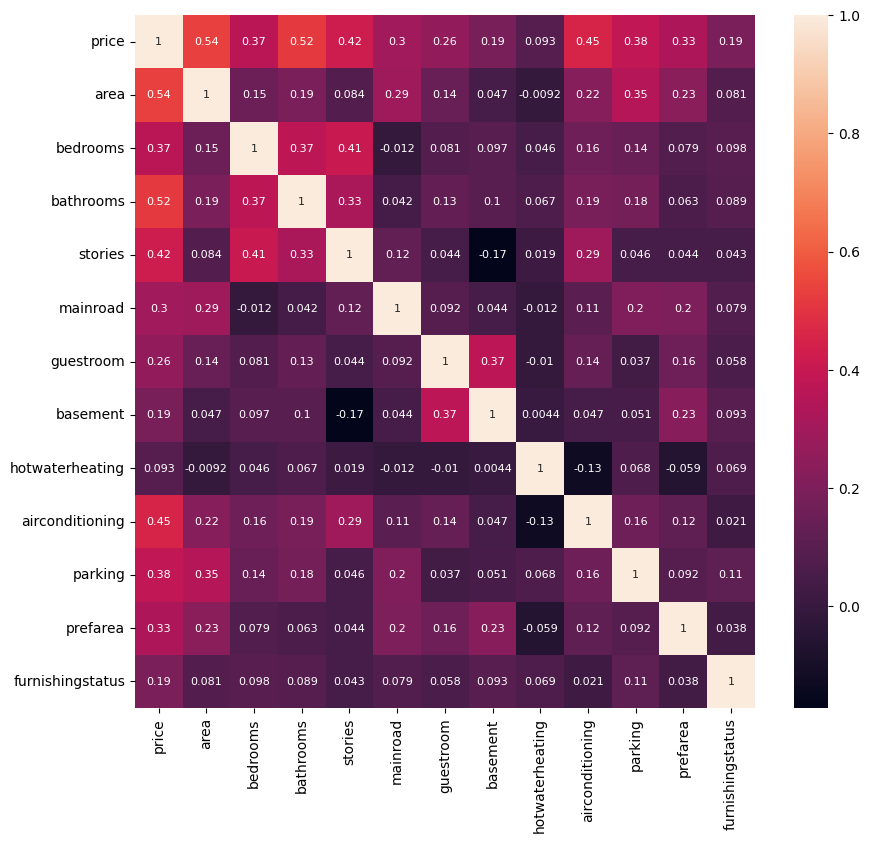

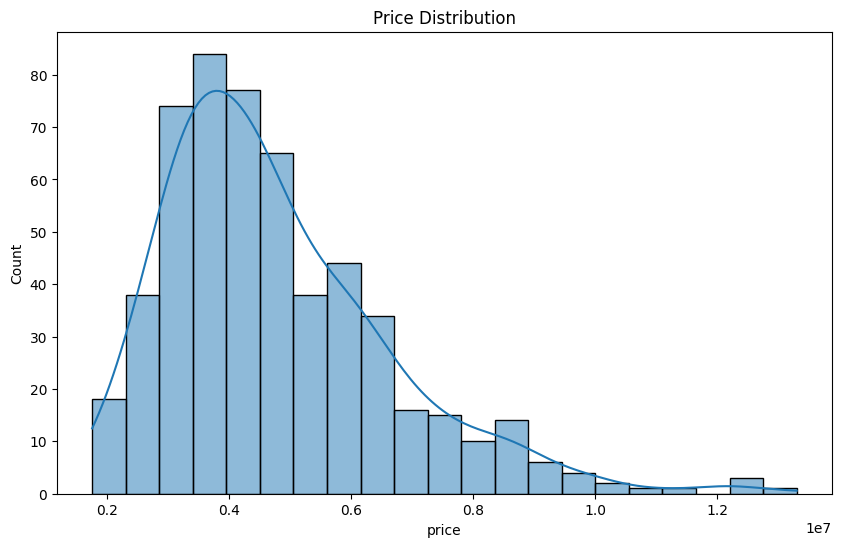

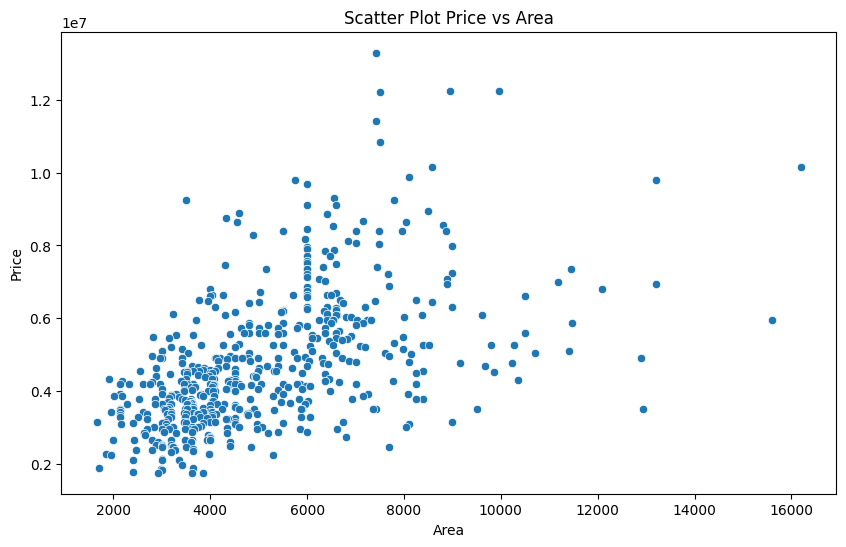

Ridge Cross-Validation RMSE: [2647419.82811005  984427.83840825  944592.44197872  918382.70722651
 1045942.77384297]
Average RMSE Ridge: 1308153.117913299
Lasso Cross-Validation RMSE: [2639984.58110564  988633.76447465  948190.30622395  920826.7741923
 1042286.93466343]
Average RMSE Lasso: 1307984.4721319943
Elastic Net Cross-Validation RMSE: [3116761.28873544  952548.41003189  849029.26432883  919547.80493076
 1465706.76962214]
Average RMSE Elastic Net: 1460718.7075298124
MSE: 1204935449596.85
RMSE: 1097695.518
R2: 0.66
MSE: 961436118597.69
RMSE: 980528.489
R2: 0.72
MSE: 1204930725286.43
RMSE: 1097693.366
R2: 0.66
MSE: 961886232398.79
RMSE: 980757.989
R2: 0.72
MSE: 1293240227187.34
RMSE: 1137207.205
R2: 0.63
MSE: 1016384763294.28
RMSE: 1008159.096
R2: 0.71
Non-zero coefficients (Ridge): 12
Non-zero coefficients (Lasso): 12
Non-zero coefficients (Elastic Net): 12


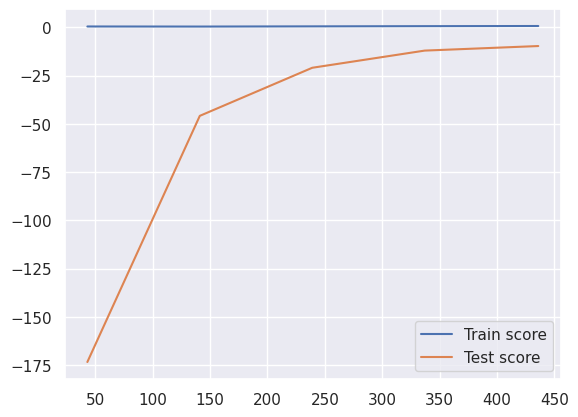

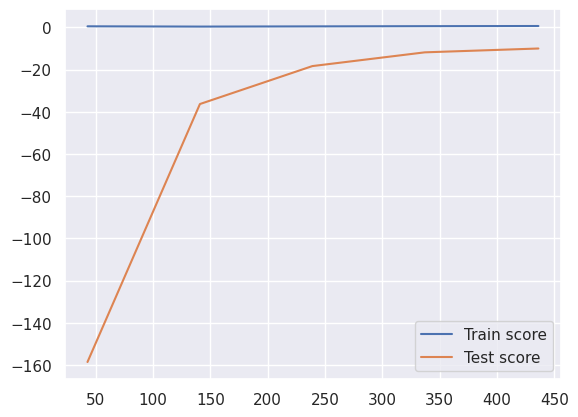

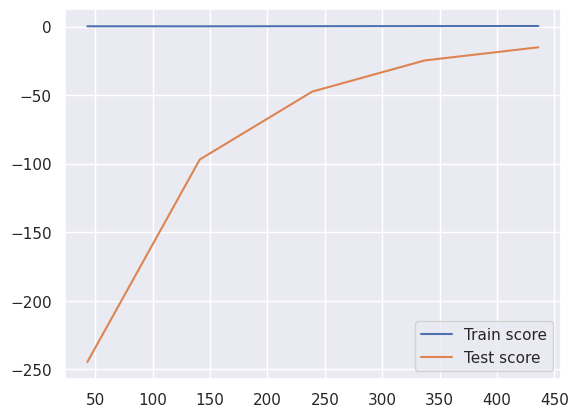

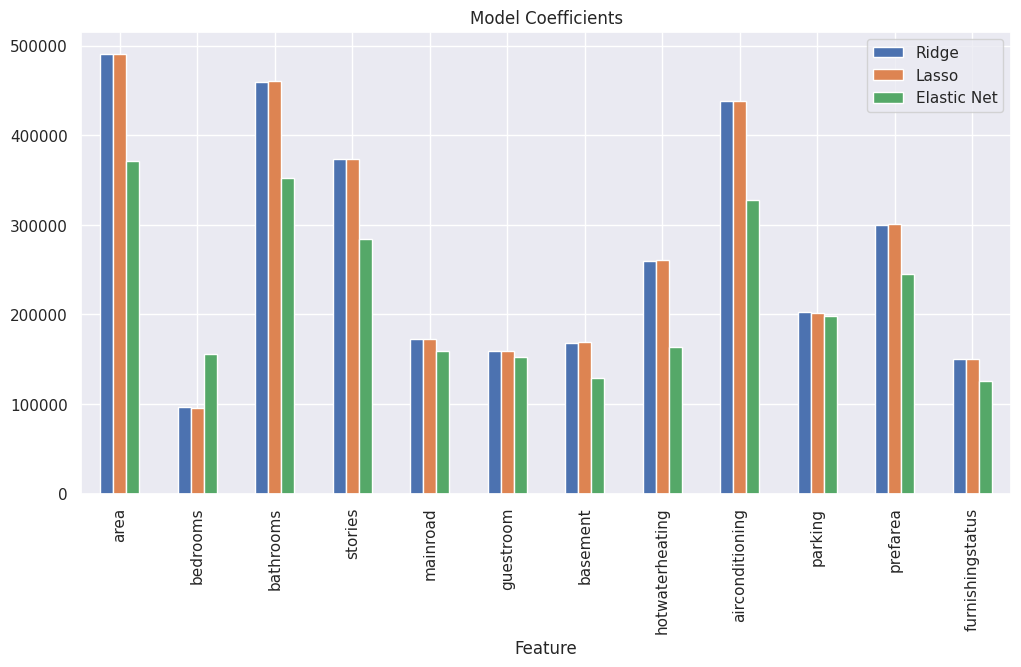

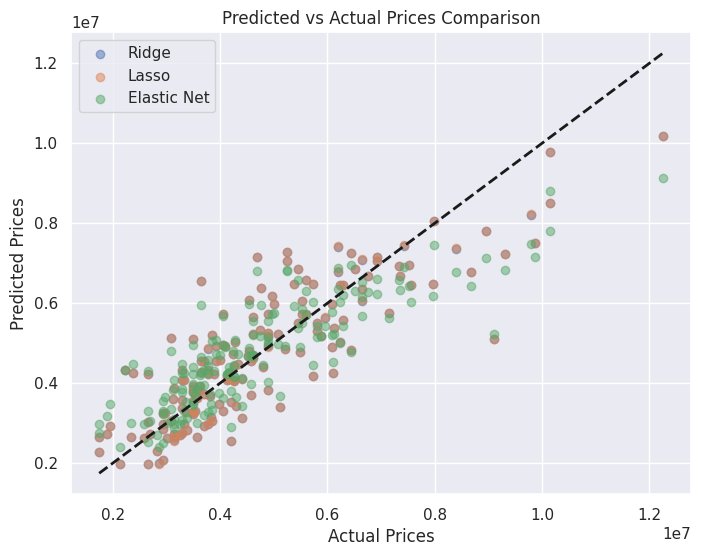

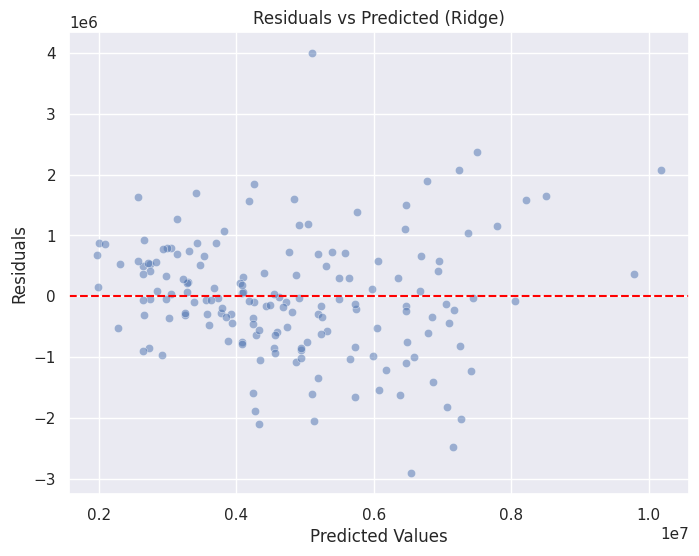

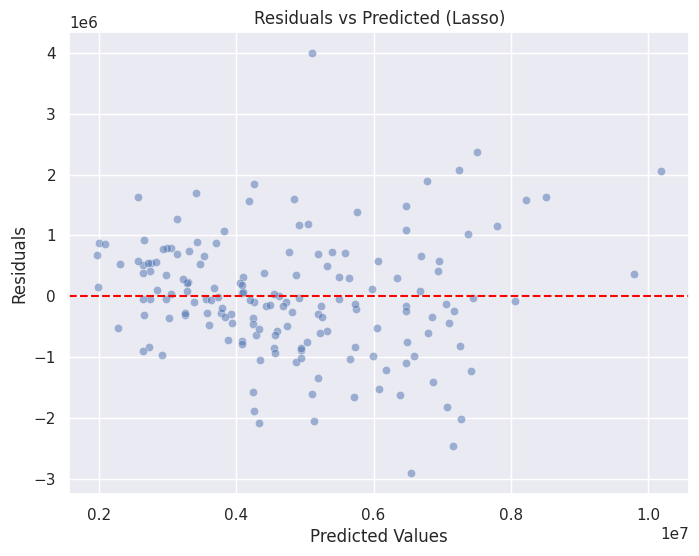

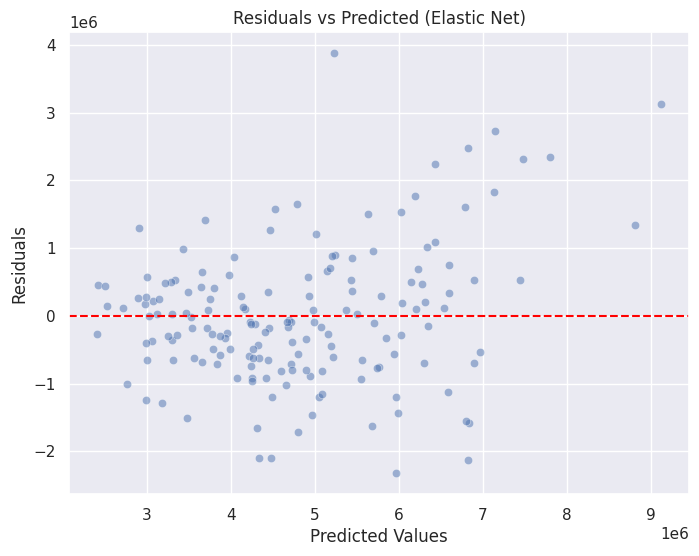

Best Ridge hyperparameters: {'alpha': 10.0}
Best Ridge score (neg_MSE): -1297867427817.4731
Test MSE (Optimized Ridge): 958023427085.2965
Test R2 (Optimized Ridge): 0.7238150196903927
Best Lasso hyperparameters: {'alpha': 0.001}
Best Lasso score (neg_MSE): -1301414799589.9438
Test MSE (Optimized Lasso): 961887081406.0996
Test R2 (Optimized Lasso): 0.7227011812785694


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.678e+14, tolerance: 9.961e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.933e+14, tolerance: 1.095e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

Best Elastic Net hyperparameters: {'alpha': 0.1, 'l1_ratio': np.float64(0.1)}
Best Elastic Net score (neg_MSE): -1295854330381.7937
Test MSE (Optimized Elastic Net): 953769680424.3763
Test R2 (Optimized Elastic Net): 0.7250413163597368


In [1]:
# RealEstateAI Solutions
# Author: Rosa Santelia

# Loading and preprocessing real estate price data

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://proai-datasets.s3.eu-west-3.amazonaws.com/housing.csv'
df = pd.read_csv(url)
df.head()
RANDOM_SEED = 0

# Handling missing values, encoding categorical variables and data scaling/normalization

df.shape

# Display information about the DataFrame which contains 545 samples and 13 features, one of which is the target
df.info()

# All variables are numeric, so no need for feature encoding

# Overview of basic statistical metrics
df.describe()

df.isna().sum()

# Variables have different scales, so scaling is necessary. No missing values found.

scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print(df_normalized.describe())
print(df_standardized.describe())

# Analyzing correlations between variables and presence of outliers

plt.figure(figsize=(10,9))
sns.heatmap(df.corr(), annot=True, annot_kws={"size":8})

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['area'], y=df['price'])
plt.title('Scatter Plot Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

# Ridge Regression: implementation and training with Ridge regularization

X = df.drop("price", axis=1).values
X.shape

y = df["price"].values
y.shape

# Evaluation function (used for all models)

def evaluate(model, dataset):
    X, y = dataset
    y_pred = model.predict(X)
    print(f"MSE: {mean_squared_error(y, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred)):.3f}")
    print(f"R2: {r2_score(y, y_pred):.2f}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED)

X_train.shape
X_test.shape

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Lasso Regression: implementation and training with Lasso regularization

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

# Elastic Net Regression: implementation and training with Elastic Net regularization

elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=RANDOM_SEED)
elastic_model.fit(X_train, y_train)

y_pred = elastic_model.predict(X_test)

# Performance evaluation

# Using cross-validation

ridge_scores = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')
ridge_rmse_scores = np.sqrt(-ridge_scores)
print("Ridge Cross-Validation RMSE:", ridge_rmse_scores)
print("Average RMSE Ridge:", ridge_rmse_scores.mean())

lasso_scores = cross_val_score(lasso_model, X, y, cv=5, scoring='neg_mean_squared_error')
lasso_rmse_scores = np.sqrt(-lasso_scores)
print("Lasso Cross-Validation RMSE:", lasso_rmse_scores)
print("Average RMSE Lasso:", lasso_rmse_scores.mean())

elastic_scores = cross_val_score(elastic_model, X, y, cv=5, scoring='neg_mean_squared_error')
elastic_rmse_scores = np.sqrt(-elastic_scores)
print("Elastic Net Cross-Validation RMSE:", elastic_rmse_scores)
print("Average RMSE Elastic Net:", elastic_rmse_scores.mean())

# Evaluation with additional metrics (RMSE and R2)

# Ridge Regression
evaluate(ridge_model, (X_train, y_train))
evaluate(ridge_model, (X_test, y_test))

# Lasso Regression
evaluate(lasso_model, (X_train, y_train))
evaluate(lasso_model, (X_test, y_test))

# Elastic Net Regression
evaluate(elastic_model, (X_train, y_train))
evaluate(elastic_model, (X_test, y_test))

# Comparing model complexity by number of non-zero coefficients

ridge_non_zero = np.sum(ridge_model.coef_ != 0)
lasso_non_zero = np.sum(lasso_model.coef_ != 0)
elastic_non_zero = np.sum(elastic_model.coef_ != 0)

print(f"Non-zero coefficients (Ridge): {ridge_non_zero}")
print(f"Non-zero coefficients (Lasso): {lasso_non_zero}")
print(f"Non-zero coefficients (Elastic Net): {elastic_non_zero}")

# Model comparison and result analysis

# Ridge and Lasso performed similarly, slightly better than Elastic Net.
# Ridge and Lasso seem to generalize better on new data.
#
# All three models show good generalization, with better performance on the test set than on training – a good sign (low overfitting).
#
# Prediction error:
# RMSE is high, so there's still significant room for improvement.
# Try more complex models or improve the feature set.
#
# Feature selection:
# Lasso and Elastic Net did not eliminate any features (all 12 coefficients are non-zero).
#
# Next steps:
# Hyperparameter tuning
# Try other models

# Plotting model performance (learning curves)

# Ridge
sns.set_theme()
train_sizes_abs, train_scores, test_scores = learning_curve(
    Ridge(alpha=10.0),
    X,
    y,
    random_state=RANDOM_SEED
)

plt.plot(train_sizes_abs, train_scores.mean(axis=1), label="Train score")
plt.plot(train_sizes_abs, test_scores.mean(axis=1), label="Test score")
plt.legend()
plt.show()

# Lasso
train_sizes_abs, train_scores, test_scores = learning_curve(
    Lasso(alpha=10.0),
    X,
    y,
    random_state=RANDOM_SEED
)

plt.plot(train_sizes_abs, train_scores.mean(axis=1), label="Train score")
plt.plot(train_sizes_abs, test_scores.mean(axis=1), label="Test score")
plt.legend()
plt.show()

# Elastic Net
train_sizes_abs, train_scores, test_scores = learning_curve(
    ElasticNet(alpha=10.0),
    X,
    y,
    random_state=RANDOM_SEED
)

plt.plot(train_sizes_abs, train_scores.mean(axis=1), label="Train score")
plt.plot(train_sizes_abs, test_scores.mean(axis=1), label="Test score")
plt.legend()
plt.show()

# Comparing coefficients

coef_df = pd.DataFrame({
    "Feature": df.drop("price", axis=1).columns,
    "Ridge": ridge_model.coef_,
    "Lasso": lasso_model.coef_,
    "Elastic Net": elastic_model.coef_,
})
coef_df.set_index("Feature").plot(kind='bar', figsize=(12,6), title="Model Coefficients")
plt.grid(True)
plt.show()

# Predicted vs Real prices

plt.figure(figsize=(8,6))
plt.scatter(y_test, ridge_model.predict(X_test), alpha=0.5, label='Ridge')
plt.scatter(y_test, lasso_model.predict(X_test), alpha=0.5, label='Lasso')
plt.scatter(y_test, elastic_model.predict(X_test), alpha=0.5, label='Elastic Net')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices Comparison")
plt.legend()
plt.grid(True)
plt.show()

# Residual plots to check model fit

y_pred = ridge_model.predict(X_test)
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Ridge)")
plt.grid(True)
plt.show()

y_pred = lasso_model.predict(X_test)
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Lasso)")
plt.grid(True)
plt.show()

y_pred = elastic_model.predict(X_test)
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Elastic Net)")
plt.grid(True)
plt.show()

# Hyperparameter tuning with Grid Search

param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}
grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)
print("Best Ridge hyperparameters:", grid_search_ridge.best_params_)
print("Best Ridge score (neg_MSE):", grid_search_ridge.best_score_)
best_ridge_model = grid_search_ridge.best_estimator_
y_pred_ridge_best = best_ridge_model.predict(X_test)
mse_ridge_best = mean_squared_error(y_test, y_pred_ridge_best)
r2_ridge_best = r2_score(y_test, y_pred_ridge_best)
print("Test MSE (Optimized Ridge):", mse_ridge_best)
print("Test R2 (Optimized Ridge):", r2_ridge_best)

param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
lasso = Lasso()
grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)
print("Best Lasso hyperparameters:", grid_search_lasso.best_params_)
print("Best Lasso score (neg_MSE):", grid_search_lasso.best_score_)
best_lasso_model = grid_search_lasso.best_estimator_
y_pred_lasso_best = best_lasso_model.predict(X_test)
mse_lasso_best = mean_squared_error(y_test, y_pred_lasso_best)
r2_lasso_best = r2_score(y_test, y_pred_lasso_best)
print("Test MSE (Optimized Lasso):", mse_lasso_best)
print("Test R2 (Optimized Lasso):", r2_lasso_best)

param_grid_elasticnet = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'l1_ratio': np.arange(0.0, 1.01, 0.1)
}
elastic_net = ElasticNet()
grid_search_elasticnet = GridSearchCV(elastic_net, param_grid_elasticnet, cv=5, scoring='neg_mean_squared_error')
grid_search_elasticnet.fit(X_train, y_train)
print("Best Elastic Net hyperparameters:", grid_search_elasticnet.best_params_)
print("Best Elastic Net score (neg_MSE):", grid_search_elasticnet.best_score_)
best_elasticnet_model = grid_search_elasticnet.best_estimator_
y_pred_elasticnet_best = best_elasticnet_model.predict(X_test)
mse_elasticnet_best = mean_squared_error(y_test, y_pred_elasticnet_best)
r2_elasticnet_best = r2_score(y_test, y_pred_elasticnet_best)
print("Test MSE (Optimized Elastic Net):", mse_elasticnet_best)
print("Test R2 (Optimized Elastic Net):", r2_elasticnet_best)

